# Health Data Project 

## Table of Content

### 1. Sleep Data

### 2. Exercise Data

### 3. Step Count Data

### 4. Heart Rate Data

### 5. Floors Climbed Data

In [1]:
# # import all the necessary libraries

%matplotlib inline

import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # # Linear Algebra
from glob import glob 
import datetime 
from pandas import DataFrame, to_datetime, to_timedelta

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Gets rid of the seaborn 'FutureWarning'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
sleep_df = pd.read_csv("C:/Users/PARI/Desktop/lantern/8_session/sleep.csv")
step_count_df = pd.read_csv("C:/Users/PARI/Desktop/lantern/8_session/step_count.csv")
exercise_df = pd.read_csv("C:/Users/PARI/Desktop/lantern/8_session/exercise.csv")
heart_rate_df = pd.read_csv("C:/Users/PARI/Desktop/lantern/8_session/heart_rate.csv")
floors_climbed_df = pd.read_csv("C:/Users/PARI/Desktop/lantern/8_session/floors_climbed.csv")
summary_df = pd.read_csv("C:/Users/PARI/Desktop/lantern/8_session/summary.csv")

In [ ]:
sleep_df = pd.read_csv("C:/Users/PARI/Desktop/lantern/8_session/sleep.csv")

In [3]:
step_count_df.head()

,Unnamed: 0,end_time,start_time,count,calorie,sample_position_type,deviceuuid,update_time,speed,pkg_name,time_offset,custom,distance,datauuid,create_time
0,0,2018-12-26 23:27:59.999,2018-12-26 23:27:00.000,70,3.44,230002.0,F/D7+hL5E5,2018-12-26 23:35:00.296,1.833333,com.sec.android.app.shealth,UTC-0500,NaN,60.88,00083c05-4f22-1522-694a-36bd54e6f09b,2018-12-26 23:35:00.296
1,1,2018-12-08 23:12:00.000,2018-12-08 23:11:00.000,1,0.04,NaN,jQfnryI8/B,2018-12-08 23:11:00.484,1.333333,com.sec.android.app.shealth,UTC-0500,NaN,0.77,00122feb-c1d7-497f-98ad-0c0e31e89465,2018-12-08 23:11:00.484
2,2,2018-12-08 21:53:59.999,2018-12-08 21:53:00.000,30,1.25,230002.0,F/D7+hL5E5,2018-12-08 21:55:00.238,1.250000,com.sec.android.app.shealth,UTC-0500,NaN,21.25,00152c2f-41ce-c19e-67c0-264c410a6a77,2018-12-08 21:55:00.237
3,3,2019-01-02 13:34:00.000,2019-01-02 13:33:00.000,37,1.48,NaN,jQfnryI8/B,2019-01-02 13:35:02.630,1.361111,com.sec.android.app.shealth,UTC-0500,NaN,28.58,001ac2c7-696b-4d29-b5f9-4fc4c8db4b66,2019-01-02 13:35:02.630
4,4,2019-01-01 22:36:59.999,2019-01-01 22:36:00.000,18,0.75,230002.0,F/D7+hL5E5,2019-01-01 22:55:00.224,1.500000,com.sec.android.app.shealth,UTC-0500,NaN,12.72,001ba89a-82c9-2b91-359d-778bf774182d,2019-01-01 22:55:00.224


In [4]:
exercise_df.head()

,Unnamed: 0,end_time,altitude_loss,max_altitude,start_time,count,altitude_gain,exercise_custom_type,duration,deviceuuid,...,count_type,live_data,max_caloricburn_rate,custom,comment,additional,distance,location_data,datauuid,create_time
0,0,2018-04-07 21:40:40.673,NaN,NaN,2018-04-07 21:26:10.149,NaN,NaN,NaN,870524,F/D7+hL5E5,...,NaN,009c4899-f8fb-c887-294a-045dcce7c880.live_data...,NaN,NaN,NaN,NaN,1008.61,009c4899-f8fb-c887-294a-045dcce7c880.location_...,009c4899-f8fb-c887-294a-045dcce7c880,2018-04-07 21:41:42.416
1,1,2018-01-27 15:08:00.000,NaN,NaN,2018-01-27 14:38:00.000,0.0,NaN,NaN,1800000,jQfnryI8/B,...,30004.0,NaN,NaN,NaN,NaN,NaN,0.00,NaN,013f807f-0b24-45da-9df7-446c2e297a4f,2018-01-27 15:08:40.225
2,2,2018-09-04 01:35:14.221,NaN,NaN,2018-09-04 01:23:23.355,NaN,NaN,NaN,710866,F/D7+hL5E5,...,NaN,019f38b0-adea-a157-dd7d-07af53a3ad0b.live_data...,NaN,NaN,NaN,NaN,997.50,019f38b0-adea-a157-dd7d-07af53a3ad0b.location_...,019f38b0-adea-a157-dd7d-07af53a3ad0b,2018-09-04 01:36:15.337
3,3,2018-09-12 01:33:53.262,NaN,NaN,2018-09-12 01:21:34.461,NaN,NaN,NaN,738801,F/D7+hL5E5,...,NaN,01d238fd-1111-a35d-ee11-1859abc1c8a9.live_data...,NaN,NaN,NaN,NaN,780.37,01d238fd-1111-a35d-ee11-1859abc1c8a9.location_...,01d238fd-1111-a35d-ee11-1859abc1c8a9,2018-09-12 01:34:54.418
4,4,2018-05-01 22:12:20.915,NaN,NaN,2018-05-01 22:01:24.059,NaN,NaN,NaN,656856,F/D7+hL5E5,...,NaN,020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...,NaN,NaN,NaN,NaN,765.12,020502c3-3cc7-8d33-f7bc-2d8e27609a47.location_...,020502c3-3cc7-8d33-f7bc-2d8e27609a47,2018-05-01 22:13:21.374


In [5]:
heart_rate_df.head()

,Unnamed: 0,end_time,heart_rate,binning_data,start_time,heart_beat_count,update_time,deviceuuid,max,min,pkg_name,time_offset,custom,comment,datauuid,create_time
0,0,2018-12-12 09:30:29.257,57.0,NaN,2018-12-12 09:30:29.257,1,2018-12-12 09:35:00.239,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0500,NaN,NaN,0002f020-959a-8d57-4380-35d995bc7b86,2018-12-12 09:35:00.239
1,1,2018-10-23 18:00:29.301,60.0,NaN,2018-10-23 18:00:29.301,1,2018-10-23 18:15:00.330,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0400,NaN,NaN,000334b3-bf4c-f59e-f710-a9f4d4a748a0,2018-10-23 18:15:00.330
2,2,2018-07-22 06:10:29.318,66.0,NaN,2018-07-22 06:10:29.318,1,2018-07-22 06:15:00.249,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0400,NaN,NaN,00066e92-c981-df35-819d-8b2e230bc3d4,2018-07-22 06:15:00.249
3,3,2018-10-08 02:00:29.324,69.0,NaN,2018-10-08 02:00:29.324,1,2018-10-08 02:13:22.101,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0400,NaN,NaN,0007c0e9-1f83-749e-5b46-1a09ff73be3e,2018-10-08 02:13:22.101
4,4,2018-08-29 06:30:29.290,58.0,NaN,2018-08-29 06:30:29.290,1,2018-08-29 06:35:00.241,F/D7+hL5E5,0.0,0.0,com.sec.android.app.shealth,UTC-0400,NaN,NaN,000caa8c-6ccf-44ca-4f4a-95b77c3433e8,2018-08-29 06:35:00.241


In [6]:
floors_climbed_df.head()

,Unnamed: 0,end_time,pkg_name,time_offset,start_time,custom,floor,datauuid,update_time,deviceuuid,create_time
0,0,2018-08-10 21:31:42.000,com.sec.android.app.shealth,UTC-0400,2018-08-10 21:30:01.000,NaN,8.0,000e4bf1-b1c0-2ec3-e713-826b9c3fef22,2018-08-10 21:31:53.453,F/D7+hL5E5,2018-08-10 21:31:52.856
1,1,2018-11-06 22:33:11.000,com.sec.android.app.shealth,UTC-0500,2018-11-06 22:32:54.000,NaN,1.0,0022234b-37ac-242d-bd1d-6a3bf2640b8d,2018-11-06 22:46:57.117,F/D7+hL5E5,2018-11-06 22:46:57.116
2,2,2018-07-03 11:50:25.000,com.sec.android.app.shealth,UTC-0400,2018-07-03 11:50:11.000,NaN,1.0,003cf4e5-e2e7-3282-6400-0b2f13e46ab5,2018-07-03 11:52:31.712,F/D7+hL5E5,2018-07-03 11:52:31.712
3,3,2018-01-25 02:30:56.000,com.sec.android.app.shealth,UTC-0500,2018-01-25 02:29:51.000,NaN,2.0,00443274-6e30-97f9-3eb2-75d17f3e766f,2018-01-25 02:34:47.756,F/D7+hL5E5,2018-01-25 02:34:47.720
4,4,2018-07-03 12:42:05.000,com.sec.android.app.shealth,UTC-0400,2018-07-03 12:41:54.000,NaN,1.0,008bbe7f-26f7-5c1f-7f5d-5fa6d3e73f1c,2018-07-03 12:52:03.893,F/D7+hL5E5,2018-07-03 12:52:03.893


## Analyzing all the datasets

### 1. Sleep Data

In [7]:
sleep_df.head()

,Unnamed: 0,efficiency,extra_data,has_sleep_data,com.samsung.health.sleep.comment,com.samsung.health.sleep.datauuid,quality,com.samsung.health.sleep.custom,com.samsung.health.sleep.end_time,original_wake_up_time,com.samsung.health.sleep.start_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.deviceuuid,com.samsung.health.sleep.update_time,original_bed_time,com.samsung.health.sleep.create_time,com.samsung.health.sleep.pkg_name,original_efficiency
0,0,91.540790,NaN,1.0,NaN,00018ab3-e237-658f-6a4c-0ac9fd1e439e,NaN,NaN,1538205120000,NaN,1538185320000,UTC-0400,F/D7+hL5E5,1538205990294,NaN,1538205990294,com.sec.android.app.shealth,NaN
1,1,90.769230,NaN,1.0,NaN,0191b301-17de-40e1-0626-909863967f0f,NaN,NaN,1536662400000,NaN,1536635160000,UTC-0400,F/D7+hL5E5,1536663146013,NaN,1536663146013,com.sec.android.app.shealth,NaN
2,2,97.391304,NaN,1.0,NaN,01df9633-a82a-cf08-921c-358a47c0f1bb,NaN,NaN,1535714940000,NaN,1535708100000,UTC-0400,F/D7+hL5E5,1535715043724,NaN,1535715043724,com.sec.android.app.shealth,NaN
3,3,92.555330,NaN,1.0,NaN,0398e3ab-bec6-2ad9-8fae-9d64ea80e7c1,NaN,NaN,1543055160000,NaN,1543025400000,UTC-0500,F/D7+hL5E5,1543055270788,NaN,1543055270788,com.sec.android.app.shealth,NaN
4,4,92.663040,NaN,1.0,NaN,03f12ce0-9ade-5c74-9d57-686fd3966f2a,50003.0,NaN,1520501400000,2018-03-08 09:30:00.000,1520479380000,UTC-0500,F/D7+hL5E5,1520516398387,2018-03-08 03:23:00.000,1520501522181,com.sec.android.app.shealth,92.66304


In [8]:
# Use info function to see the data type and not null columns in sleep_df
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 18 columns):
Unnamed: 0                              501 non-null int64
efficiency                              501 non-null float64
extra_data                              0 non-null float64
has_sleep_data                          499 non-null float64
com.samsung.health.sleep.comment        0 non-null float64
com.samsung.health.sleep.datauuid       501 non-null object
quality                                 38 non-null float64
com.samsung.health.sleep.custom         0 non-null float64
com.samsung.health.sleep.end_time       501 non-null int64
original_wake_up_time                   36 non-null object
com.samsung.health.sleep.start_time     501 non-null int64
com.samsung.health.sleep.time_offset    501 non-null object
com.samsung.health.sleep.deviceuuid     501 non-null object
com.samsung.health.sleep.update_time    501 non-null int64
original_bed_time                       36 non-null object
co

In [9]:
sleep_df.isnull().sum()

Unnamed: 0                                0
efficiency                                0
extra_data                              501
has_sleep_data                            2
com.samsung.health.sleep.comment        501
com.samsung.health.sleep.datauuid         0
quality                                 463
com.samsung.health.sleep.custom         501
com.samsung.health.sleep.end_time         0
original_wake_up_time                   465
com.samsung.health.sleep.start_time       0
com.samsung.health.sleep.time_offset      0
com.samsung.health.sleep.deviceuuid       0
com.samsung.health.sleep.update_time      0
original_bed_time                       465
com.samsung.health.sleep.create_time      0
com.samsung.health.sleep.pkg_name         0
original_efficiency                     465
dtype: int64

In [10]:
sleep_df.isnull().sum().sort_values(ascending=False)

com.samsung.health.sleep.custom         501
extra_data                              501
com.samsung.health.sleep.comment        501
original_efficiency                     465
original_bed_time                       465
original_wake_up_time                   465
quality                                 463
has_sleep_data                            2
efficiency                                0
com.samsung.health.sleep.datauuid         0
com.samsung.health.sleep.end_time         0
com.samsung.health.sleep.pkg_name         0
com.samsung.health.sleep.start_time       0
com.samsung.health.sleep.time_offset      0
com.samsung.health.sleep.deviceuuid       0
com.samsung.health.sleep.update_time      0
com.samsung.health.sleep.create_time      0
Unnamed: 0                                0
dtype: int64

In [11]:
sleep_df.keys()

Index(['Unnamed: 0', 'efficiency', 'extra_data', 'has_sleep_data',
       'com.samsung.health.sleep.comment', 'com.samsung.health.sleep.datauuid',
       'quality', 'com.samsung.health.sleep.custom',
       'com.samsung.health.sleep.end_time', 'original_wake_up_time',
       'com.samsung.health.sleep.start_time',
       'com.samsung.health.sleep.time_offset',
       'com.samsung.health.sleep.deviceuuid',
       'com.samsung.health.sleep.update_time', 'original_bed_time',
       'com.samsung.health.sleep.create_time',
       'com.samsung.health.sleep.pkg_name', 'original_efficiency'],
      dtype='object')

### 2. Step Count Data

In [12]:
step_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6199 entries, 0 to 6198
Data columns (total 15 columns):
Unnamed: 0              6199 non-null int64
end_time                6199 non-null object
start_time              6199 non-null object
count                   6199 non-null int64
calorie                 6199 non-null float64
sample_position_type    4314 non-null float64
deviceuuid              6199 non-null object
update_time             6199 non-null object
speed                   6199 non-null float64
pkg_name                6199 non-null object
time_offset             6199 non-null object
custom                  0 non-null float64
distance                6199 non-null float64
datauuid                6199 non-null object
create_time             6199 non-null object
dtypes: float64(5), int64(2), object(8)
memory usage: 726.5+ KB


In [13]:
step_count_df.isnull().sum().sort_values(ascending=False)

custom                  6199
sample_position_type    1885
create_time                0
datauuid                   0
distance                   0
time_offset                0
pkg_name                   0
speed                      0
update_time                0
deviceuuid                 0
calorie                    0
count                      0
start_time                 0
end_time                   0
Unnamed: 0                 0
dtype: int64

In [14]:
step_count_df.keys()

Index(['Unnamed: 0', 'end_time', 'start_time', 'count', 'calorie',
       'sample_position_type', 'deviceuuid', 'update_time', 'speed',
       'pkg_name', 'time_offset', 'custom', 'distance', 'datauuid',
       'create_time'],
      dtype='object')

### 3. Exercise Data

In [15]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 40 columns):
Unnamed: 0               876 non-null int64
end_time                 876 non-null object
altitude_loss            8 non-null float64
max_altitude             24 non-null float64
start_time               876 non-null object
count                    87 non-null float64
altitude_gain            8 non-null float64
exercise_custom_type     0 non-null float64
duration                 876 non-null int64
deviceuuid               876 non-null object
max_heart_rate           555 non-null float64
max_rpm                  0 non-null float64
mean_heart_rate          555 non-null float64
pkg_name                 876 non-null object
max_cadence              556 non-null float64
time_offset              876 non-null object
mean_caloricburn_rate    0 non-null float64
incline_distance         125 non-null float64
exercise_type            876 non-null int64
decline_distance         125 non-null float6

In [16]:
exercise_df.isnull().sum().sort_values(ascending=False)

exercise_custom_type     876
mean_rpm                 876
max_rpm                  876
additional               876
custom                   876
max_caloricburn_rate     876
mean_caloricburn_rate    876
mean_power               876
max_power                876
comment                  875
altitude_gain            868
altitude_loss            868
min_altitude             852
max_altitude             852
count_type               789
count                    789
decline_distance         751
incline_distance         751
max_heart_rate           321
min_heart_rate           321
mean_heart_rate          321
mean_cadence             320
max_cadence              320
max_speed                213
location_data            167
live_data                 83
mean_speed                30
distance                  30
end_time                   0
duration                   0
start_time                 0
create_time                0
deviceuuid                 0
pkg_name                   0
time_offset   

In [17]:
exercise_df.keys()

Index(['Unnamed: 0', 'end_time', 'altitude_loss', 'max_altitude', 'start_time',
       'count', 'altitude_gain', 'exercise_custom_type', 'duration',
       'deviceuuid', 'max_heart_rate', 'max_rpm', 'mean_heart_rate',
       'pkg_name', 'max_cadence', 'time_offset', 'mean_caloricburn_rate',
       'incline_distance', 'exercise_type', 'decline_distance', 'max_speed',
       'mean_power', 'max_power', 'mean_rpm', 'calorie', 'mean_cadence',
       'mean_speed', 'update_time', 'min_altitude', 'min_heart_rate',
       'count_type', 'live_data', 'max_caloricburn_rate', 'custom', 'comment',
       'additional', 'distance', 'location_data', 'datauuid', 'create_time'],
      dtype='object')

### 4. Heart Rate Data

In [18]:
heart_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726 entries, 0 to 15725
Data columns (total 16 columns):
Unnamed: 0          15726 non-null int64
end_time            15726 non-null object
heart_rate          15726 non-null float64
binning_data        38 non-null object
start_time          15726 non-null object
heart_beat_count    15726 non-null int64
update_time         15726 non-null object
deviceuuid          15726 non-null object
max                 15709 non-null float64
min                 15709 non-null float64
pkg_name            15726 non-null object
time_offset         15726 non-null object
custom              0 non-null float64
comment             0 non-null float64
datauuid            15726 non-null object
create_time         15726 non-null object
dtypes: float64(5), int64(2), object(9)
memory usage: 1.9+ MB


In [19]:
heart_rate_df.isnull().sum().sort_values(ascending=True)

Unnamed: 0              0
end_time                0
heart_rate              0
start_time              0
heart_beat_count        0
update_time             0
deviceuuid              0
pkg_name                0
time_offset             0
datauuid                0
create_time             0
max                    17
min                    17
binning_data        15688
custom              15726
comment             15726
dtype: int64

In [20]:
heart_rate_df.keys()

Index(['Unnamed: 0', 'end_time', 'heart_rate', 'binning_data', 'start_time',
       'heart_beat_count', 'update_time', 'deviceuuid', 'max', 'min',
       'pkg_name', 'time_offset', 'custom', 'comment', 'datauuid',
       'create_time'],
      dtype='object')

### 5. Floor Climbed Data

In [ ]:
floor_climbed_df.Head()

In [21]:
floors_climbed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 11 columns):
Unnamed: 0     1180 non-null int64
end_time       1180 non-null object
pkg_name       1180 non-null object
time_offset    1180 non-null object
start_time     1180 non-null object
custom         0 non-null float64
floor          1180 non-null float64
datauuid       1180 non-null object
update_time    1180 non-null object
deviceuuid     1180 non-null object
create_time    1180 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 101.5+ KB


In [22]:
floors_climbed_df.isnull().sum().sort_values(ascending=True)

Unnamed: 0        0
end_time          0
pkg_name          0
time_offset       0
start_time        0
floor             0
datauuid          0
update_time       0
deviceuuid        0
create_time       0
custom         1180
dtype: int64

In [23]:
floors_climbed_df.keys()

Index(['Unnamed: 0', 'end_time', 'pkg_name', 'time_offset', 'start_time',
       'custom', 'floor', 'datauuid', 'update_time', 'deviceuuid',
       'create_time'],
      dtype='object')

## Exploratory Data Analysis(EDA)

## Data Cleaning

### 1. Sleep Data

In [24]:
sleep_df.drop(['Unnamed: 0', 'extra_data', 'has_sleep_data',
       'com.samsung.health.sleep.comment', 'com.samsung.health.sleep.datauuid',
       'com.samsung.health.sleep.custom', 'original_wake_up_time',
       'com.samsung.health.sleep.deviceuuid',
       'com.samsung.health.sleep.update_time', 'original_bed_time',
       'com.samsung.health.sleep.pkg_name', 'original_efficiency'],\
              axis=1, inplace=True)

In [25]:
sleep_df = sleep_df.rename(columns={"com.samsung.health.sleep.end_time": "end_time",\
                           "com.samsung.health.sleep.start_time": "start_time",\
                           "com.samsung.health.sleep.time_offset": "time_offset",\
                            "com.samsung.health.sleep.create_time": "create_time",
                           "quality":"sleep_quality", "efficiency": "sleep_efficiency"})

In [26]:
for i, ts in enumerate (sleep_df.start_time):
    sleep_df.start_time[i]=datetime.datetime.fromtimestamp(ts/1000)
    
for i, ts in enumerate (sleep_df.end_time):
    sleep_df.end_time[i]=datetime.datetime.fromtimestamp(ts/1000)
    
for i, ts in enumerate (sleep_df.create_time):
    sleep_df.create_time[i]=datetime.datetime.fromtimestamp(ts/1000)

C:\Users\PARI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\PARI\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\PARI\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
sleep_df.start_time = pd.to_datetime(sleep_df.start_time)
sleep_df.end_time = pd.to_datetime(sleep_df.end_time)

In [28]:
#Create a new column for sleep duration
sleep_df["total_sleep_duration"] = abs((sleep_df.end_time-sleep_df.start_time)/np.timedelta64(1,'h'))

In [29]:
sleep_df['Day'] = sleep_df['create_time'].apply(lambda datestamp: datestamp.day)
sleep_df['Year'] = sleep_df['create_time'].apply(lambda datestamp: datestamp.year)


#Functions to get days of the week and months as strings instead of indexes 
#(0-6 and 0-12 respectively)

def dayofweek(datestamp):
    return ['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun'][datestamp.weekday()]
def monthname(datestamp):
    return ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][datestamp.month-1]

sleep_df['Weekday'] = sleep_df['create_time'].apply(lambda datestamp: dayofweek(datestamp)) 
sleep_df['MonthName'] = sleep_df['create_time'].apply(lambda datestamp: monthname(datestamp))

#Keeping the month as an index to construct the yearmonth column below:

sleep_df['Month'] = sleep_df['create_time'].apply(lambda datestamp: datestamp.month)

#Function to get a combined 'YearMonth' column

def yearmonth(cols):
    month=cols[0]
    year=cols[1]
    return '{}-{}'.format(month, year)

sleep_df['YearMonth'] = sleep_df[['Month', 'Year']].apply(lambda cols: yearmonth(cols),\
                                                                    axis=1)

sleep_df.tail()

,sleep_efficiency,sleep_quality,end_time,start_time,time_offset,create_time,total_sleep_duration,Day,Year,Weekday,MonthName,Month,YearMonth
496,89.980736,NaN,2018-11-23 06:52:00,2018-11-22 22:14:00,UTC-0500,2018-11-23 07:07:22.308000,8.633333,23,2018,Fri,Nov,11,11-2018
497,93.318490,NaN,2018-06-22 06:22:00,2018-06-21 22:53:00,UTC-0400,2018-06-22 06:22:42.362000,7.483333,22,2018,Fri,Jun,6,6-2018
498,90.839700,NaN,2018-05-20 08:16:00,2018-05-20 01:44:00,UTC-0400,2018-05-20 08:30:45.314000,6.533333,20,2018,Sun,May,5,5-2018
499,93.561370,NaN,2018-06-19 05:30:00,2018-06-18 21:14:00,UTC-0400,2018-06-19 05:31:29.041000,8.266667,19,2018,Tue,Jun,6,6-2018
500,92.777780,NaN,2018-06-18 05:46:00,2018-06-17 23:47:00,UTC-0400,2018-06-18 06:01:01.351000,5.983333,18,2018,Mon,Jun,6,6-2018


In [30]:
sleep_df["localized_time"] = sleep_df["start_time"].dt.tz_localize("CET")

In [31]:
sleep_df["localized_time"] = sleep_df["localized_time"].dt.time

In [32]:
sleep_df['sleep_quality'].unique()

array([   nan, 50003., 50004., 50005., 50002., 50001.])

In [94]:
sleep_df.start_time.sort_values().head()

55    2017-12-16 00:02:00
300   2017-12-17 22:31:00
78    2017-12-19 22:55:00
203   2017-12-22 03:57:00
291   2017-12-23 04:48:00
Name: start_time, dtype: datetime64[ns]

In [95]:
sleep_df.end_time.sort_values().head()

55    2017-12-16 06:53:00
300   2017-12-18 06:42:00
78    2017-12-20 03:48:00
203   2017-12-22 12:18:00
291   2017-12-23 10:10:00
Name: end_time, dtype: datetime64[ns]

In [ ]:
sleep_df.groupby(sle)

### 2. Step Count Data

In [33]:
step_count_df.drop(["Unnamed: 0", "update_time", "pkg_name", "custom",\
                    "sample_position_type", "deviceuuid","datauuid"], axis=1, inplace=True)
step_count_df.head()

,end_time,start_time,count,calorie,speed,time_offset,distance,create_time
0,2018-12-26 23:27:59.999,2018-12-26 23:27:00.000,70,3.44,1.833333,UTC-0500,60.88,2018-12-26 23:35:00.296
1,2018-12-08 23:12:00.000,2018-12-08 23:11:00.000,1,0.04,1.333333,UTC-0500,0.77,2018-12-08 23:11:00.484
2,2018-12-08 21:53:59.999,2018-12-08 21:53:00.000,30,1.25,1.250000,UTC-0500,21.25,2018-12-08 21:55:00.237
3,2019-01-02 13:34:00.000,2019-01-02 13:33:00.000,37,1.48,1.361111,UTC-0500,28.58,2019-01-02 13:35:02.630
4,2019-01-01 22:36:59.999,2019-01-01 22:36:00.000,18,0.75,1.500000,UTC-0500,12.72,2019-01-01 22:55:00.224


In [34]:
step_count_df = step_count_df.rename(columns={"calorie": "step_calorie",
                                               "distance": "step_distance",
                                               "speed": "step_speed",
                                               "count": "step_count"})

In [35]:
#Convert all date columns into datetime
step_count_df["end_time"]=pd.to_datetime(step_count_df["end_time"])
step_count_df["start_time"]=pd.to_datetime(step_count_df["start_time"])
step_count_df["create_time"]=pd.to_datetime(step_count_df["create_time"])

In [36]:
step_count_df['Day'] = step_count_df['create_time'].apply(lambda datestamp: datestamp.day)
step_count_df['Year'] = step_count_df['create_time'].apply(lambda datestamp: datestamp.year)


#Functions to get days of the week and months as strings instead of indexes 
#(0-6 and 0-12 respectively)

def dayofweek(datestamp):
    return ['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun'][datestamp.weekday()]
def monthname(datestamp):
    return ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][datestamp.month-1]

step_count_df['Weekday'] = step_count_df['create_time'].apply(lambda datestamp: dayofweek(datestamp)) 
step_count_df['MonthName'] = step_count_df['create_time'].apply(lambda datestamp: monthname(datestamp))

#Keeping the month as an index to construct the yearmonth column below:

step_count_df['Month'] = step_count_df['create_time'].apply(lambda datestamp: datestamp.month)

#Function to get a combined 'YearMonth' column

def yearmonth(cols):
    month=cols[0]
    year=cols[1]
    return '{}-{}'.format(month, year)

step_count_df['YearMonth'] = step_count_df[['Month', 'Year']].apply(lambda cols: yearmonth(cols),\
                                                                    axis=1)

step_count_df.tail()

,end_time,start_time,step_count,step_calorie,step_speed,time_offset,step_distance,create_time,Day,Year,Weekday,MonthName,Month,YearMonth
6194,2018-12-22 18:10:00.000,2018-12-22 18:09:00,76,3.25,2.555556,UTC-0500,61.55,2018-12-22 18:15:00.847,22,2018,Sat,Dec,12,12-2018
6195,2018-12-08 23:21:59.999,2018-12-08 23:21:00,16,0.69,1.500000,UTC-0500,11.62,2018-12-08 23:35:00.210,8,2018,Sat,Dec,12,12-2018
6196,2019-01-03 00:18:00.000,2019-01-03 00:17:00,113,4.52,1.473500,UTC-0500,88.41,2019-01-03 00:30:35.344,3,2019,Thur,Jan,1,1-2019
6197,2018-12-02 00:22:59.999,2018-12-02 00:22:00,96,6.70,1.305556,UTC-0500,46.72,2018-12-02 00:25:34.488,2,2018,Sun,Dec,12,12-2018
6198,2018-12-24 01:55:00.000,2018-12-24 01:54:00,58,2.37,1.277778,UTC-0500,44.57,2018-12-24 01:55:00.486,24,2018,Mon,Dec,12,12-2018


In [37]:
step_count_df["localized_time"] = step_count_df["start_time"].dt.tz_localize("CET")

In [38]:
step_count_df["localized_time"] = step_count_df["localized_time"].dt.time

In [39]:
step_count_df['step_count'].describe()

count    6199.000000
mean       47.930473
std        33.584263
min         0.000000
25%        20.000000
50%        37.000000
75%        71.000000
max       161.000000
Name: step_count, dtype: float64

In [40]:
step_count_df[step_count_df['step_count'] == step_count_df['step_count'].max()][['Day','MonthName', 'Year']]

,Day,MonthName,Year
2761,14,Dec,2018


In [41]:
total_distance = step_count_df['step_distance'].sum()
total_steps =  step_count_df['step_count'].sum()
average_step = total_distance/total_steps
print('Average step size = {:.2f} cm'.format(average_step))

Average step size = 0.75 cm


### 3. Exercise Data

In [75]:
exercise_df.head()

,Unnamed: 0,end_time,altitude_loss,max_altitude,start_time,count,altitude_gain,exercise_custom_type,duration,deviceuuid,...,create_time,Day,Year,Weekday,MonthName,Month,YearMonth,exercised_time,places,name_of_exercise
0,0,2018-04-07 21:40:40.673,NaN,NaN,2018-04-07 21:26:10.149,NaN,NaN,NaN,870524,F/D7+hL5E5,...,2018-04-07 21:41:42.416,7,2018,Sat,Apr,4,4-2018,0.241812,Halifax(Atlantic),Walking
1,1,2018-01-27 15:08:00.000,NaN,NaN,2018-01-27 14:38:00.000,0.0,NaN,NaN,1800000,jQfnryI8/B,...,2018-01-27 15:08:40.225,27,2018,Sat,Jan,1,1-2018,0.500000,Toronto(Eastern),Swimming
2,2,2018-09-04 01:35:14.221,NaN,NaN,2018-09-04 01:23:23.355,NaN,NaN,NaN,710866,F/D7+hL5E5,...,2018-09-04 01:36:15.337,4,2018,Tue,Sep,9,9-2018,0.197463,Halifax(Atlantic),Walking
3,3,2018-09-12 01:33:53.262,NaN,NaN,2018-09-12 01:21:34.461,NaN,NaN,NaN,738801,F/D7+hL5E5,...,2018-09-12 01:34:54.418,12,2018,Wed,Sep,9,9-2018,0.205223,Halifax(Atlantic),Walking
4,4,2018-05-01 22:12:20.915,NaN,NaN,2018-05-01 22:01:24.059,NaN,NaN,NaN,656856,F/D7+hL5E5,...,2018-05-01 22:13:21.374,1,2018,Tue,May,5,5-2018,0.182460,Halifax(Atlantic),Walking


In [42]:
#Convert all date columns into datetime
exercise_df["end_time"]=pd.to_datetime(exercise_df["end_time"])
exercise_df["start_time"]=pd.to_datetime(exercise_df["start_time"])
exercise_df["create_time"]=pd.to_datetime(exercise_df["create_time"])

In [43]:
exercise_df['Day'] = exercise_df['create_time'].apply(lambda datestamp: datestamp.day)
exercise_df['Year'] = exercise_df['create_time'].apply(lambda datestamp: datestamp.year)


#Functions to get days of the week and months as strings instead of indexes 
#(0-6 and 0-12 respectively)

def dayofweek(datestamp):
    return ['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun'][datestamp.weekday()]
def monthname(datestamp):
    return ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][datestamp.month-1]

exercise_df['Weekday'] = exercise_df['create_time'].apply(lambda datestamp: dayofweek(datestamp)) 
exercise_df['MonthName'] = exercise_df['create_time'].apply(lambda datestamp: monthname(datestamp))

#Keeping the month as an index to construct the yearmonth column below:

exercise_df['Month'] = exercise_df['create_time'].apply(lambda datestamp: datestamp.month)

#Function to get a combined 'YearMonth' column

def yearmonth(cols):
    month=cols[0]
    year=cols[1]
    return '{}-{}'.format(month, year)

exercise_df['YearMonth'] = exercise_df[['Month', 'Year']].apply(lambda cols: yearmonth(cols),\
                                                                    axis=1)

exercise_df.tail()

,Unnamed: 0,end_time,altitude_loss,max_altitude,start_time,count,altitude_gain,exercise_custom_type,duration,deviceuuid,...,distance,location_data,datauuid,create_time,Day,Year,Weekday,MonthName,Month,YearMonth
871,871,2018-05-30 21:05:09.712,NaN,NaN,2018-05-30 20:20:55.856,NaN,NaN,NaN,2651907,F/D7+hL5E5,...,0.000,fecbae14-cdda-f646-5218-8b6cc10e46d1.location_...,fecbae14-cdda-f646-5218-8b6cc10e46d1,2018-05-30 21:05:09.883,30,2018,Wed,May,5,5-2018
872,872,2018-08-07 12:27:00.000,NaN,NaN,2018-08-07 11:57:00.000,0.0,NaN,NaN,1800000,jQfnryI8/B,...,0.000,NaN,feffe616-cac8-49d9-a3f7-265e3310f9c8,2018-08-07 20:27:12.461,7,2018,Tue,Aug,8,8-2018
873,873,2018-09-30 17:50:10.000,NaN,NaN,2018-09-30 17:14:00.000,NaN,NaN,NaN,2170072,jQfnryI8/B,...,2924.750,ff674401-6186-4d40-a6ec-5f0d019ce8d4.location_...,ff674401-6186-4d40-a6ec-5f0d019ce8d4,2018-09-30 17:55:01.168,30,2018,Sun,Sep,9,9-2018
874,874,2018-12-20 23:51:41.905,NaN,NaN,2018-12-20 23:31:38.550,NaN,NaN,NaN,1203355,F/D7+hL5E5,...,1248.442,ff77775f-b41d-22fb-241a-6b320aaad068.location_...,ff77775f-b41d-22fb-241a-6b320aaad068,2018-12-20 23:52:42.356,20,2018,Thur,Dec,12,12-2018
875,875,2018-05-23 00:09:15.435,NaN,NaN,2018-05-22 23:55:50.913,NaN,NaN,NaN,804522,F/D7+hL5E5,...,897.270,ffdc5009-4156-a944-a29d-f7dcc7d638ad.location_...,ffdc5009-4156-a944-a29d-f7dcc7d638ad,2018-05-23 00:10:15.346,23,2018,Wed,May,5,5-2018


In [ ]:
# drop unwanted columns:
exercise_df.drop(["Unnamed: 0", "datauuid", "deviceuuid","mean_cadence", "mean_rpm", "max_caloricburn_rate", "max_rpm", "mean_caloricburn_rate",
                    "mean_power", "max_power", "exercise_custom_type", "custom", "live_data", "update_time",
                    "additional" ,"comment","count", "count_type", "altitude_loss",
                    "altitude_gain", "min_altitude", "max_altitude", "decline_distance", 
                    "incline_distance","pkg_name","location_data", "duration"], axis=1, inplace=True)

### 4. Heart Rate Data

### 5. Floor Climbed Data

 ### 6. Summary  Data

## Feature Engineering

In [44]:
utc_time={"time_offset": ['UTC-0400', 'UTC-0500', 'UTC-0700', 'UTC-0800', 'UTC+0200'],
    "places": ["Halifax(Atlantic)", "Toronto(Eastern)", "Calcary(Mountain)", " Vancouver(Pacific)", "Europe"]}
places_traveled=pd.DataFrame(data=utc_time)
places_traveled.head()

,time_offset,places
0,UTC-0400,Halifax(Atlantic)
1,UTC-0500,Toronto(Eastern)
2,UTC-0700,Calcary(Mountain)
3,UTC-0800,Vancouver(Pacific)
4,UTC+0200,Europe


### 1. Sleep Data

In [45]:
#Create a new column for sleep duration
sleep_df["total_sleep_duration"] = abs((sleep_df.end_time-sleep_df.start_time)/np.timedelta64(1,'h'))

In [46]:
sleep_df.total_sleep_duration.head().mean()

5.87

In [47]:
sleep_df = pd.merge(sleep_df, places_traveled, how='left')

### 2. Step Count Data

In [48]:
# Create duration column
step_count_df["total_steped_time"]=abs((step_count_df.end_time-step_count_df.start_time)/np.timedelta64(1,'h'))

### 3. Exersise Data

In [49]:
exercise_df["exercised_time"]=abs((exercise_df.end_time-exercise_df.start_time)/np.timedelta64(1,'h'))

In [50]:
exercise_type = {"Code": [1001,1002,11007,13001,14001,15006],
                "name_of_exercise": ["Walking", "Running", 
                                  "Cycling", "Hiking", "Swimming", "Elliptical trainer"]}
exercise_name = pd.DataFrame(data=exercise_type)
exercise_name.head(10)

,Code,name_of_exercise
0,1001,Walking
1,1002,Running
2,11007,Cycling
3,13001,Hiking
4,14001,Swimming
5,15006,Elliptical trainer


In [51]:
exercise_df = pd.merge(exercise_df, places_traveled, how='left')
exercise_df.head()

,Unnamed: 0,end_time,altitude_loss,max_altitude,start_time,count,altitude_gain,exercise_custom_type,duration,deviceuuid,...,datauuid,create_time,Day,Year,Weekday,MonthName,Month,YearMonth,exercised_time,places
0,0,2018-04-07 21:40:40.673,NaN,NaN,2018-04-07 21:26:10.149,NaN,NaN,NaN,870524,F/D7+hL5E5,...,009c4899-f8fb-c887-294a-045dcce7c880,2018-04-07 21:41:42.416,7,2018,Sat,Apr,4,4-2018,0.241812,Halifax(Atlantic)
1,1,2018-01-27 15:08:00.000,NaN,NaN,2018-01-27 14:38:00.000,0.0,NaN,NaN,1800000,jQfnryI8/B,...,013f807f-0b24-45da-9df7-446c2e297a4f,2018-01-27 15:08:40.225,27,2018,Sat,Jan,1,1-2018,0.500000,Toronto(Eastern)
2,2,2018-09-04 01:35:14.221,NaN,NaN,2018-09-04 01:23:23.355,NaN,NaN,NaN,710866,F/D7+hL5E5,...,019f38b0-adea-a157-dd7d-07af53a3ad0b,2018-09-04 01:36:15.337,4,2018,Tue,Sep,9,9-2018,0.197463,Halifax(Atlantic)
3,3,2018-09-12 01:33:53.262,NaN,NaN,2018-09-12 01:21:34.461,NaN,NaN,NaN,738801,F/D7+hL5E5,...,01d238fd-1111-a35d-ee11-1859abc1c8a9,2018-09-12 01:34:54.418,12,2018,Wed,Sep,9,9-2018,0.205223,Halifax(Atlantic)
4,4,2018-05-01 22:12:20.915,NaN,NaN,2018-05-01 22:01:24.059,NaN,NaN,NaN,656856,F/D7+hL5E5,...,020502c3-3cc7-8d33-f7bc-2d8e27609a47,2018-05-01 22:13:21.374,1,2018,Tue,May,5,5-2018,0.182460,Halifax(Atlantic)


In [52]:
exercise_df = pd.merge(exercise_df, exercise_name, how='left', left_on='exercise_type', right_on='Code')
exercise_df.drop(["exercise_type"], axis=1, inplace=True)
exercise_df.drop(["Code"], axis=1, inplace=True)

exercise_df.head()

,Unnamed: 0,end_time,altitude_loss,max_altitude,start_time,count,altitude_gain,exercise_custom_type,duration,deviceuuid,...,create_time,Day,Year,Weekday,MonthName,Month,YearMonth,exercised_time,places,name_of_exercise
0,0,2018-04-07 21:40:40.673,NaN,NaN,2018-04-07 21:26:10.149,NaN,NaN,NaN,870524,F/D7+hL5E5,...,2018-04-07 21:41:42.416,7,2018,Sat,Apr,4,4-2018,0.241812,Halifax(Atlantic),Walking
1,1,2018-01-27 15:08:00.000,NaN,NaN,2018-01-27 14:38:00.000,0.0,NaN,NaN,1800000,jQfnryI8/B,...,2018-01-27 15:08:40.225,27,2018,Sat,Jan,1,1-2018,0.500000,Toronto(Eastern),Swimming
2,2,2018-09-04 01:35:14.221,NaN,NaN,2018-09-04 01:23:23.355,NaN,NaN,NaN,710866,F/D7+hL5E5,...,2018-09-04 01:36:15.337,4,2018,Tue,Sep,9,9-2018,0.197463,Halifax(Atlantic),Walking
3,3,2018-09-12 01:33:53.262,NaN,NaN,2018-09-12 01:21:34.461,NaN,NaN,NaN,738801,F/D7+hL5E5,...,2018-09-12 01:34:54.418,12,2018,Wed,Sep,9,9-2018,0.205223,Halifax(Atlantic),Walking
4,4,2018-05-01 22:12:20.915,NaN,NaN,2018-05-01 22:01:24.059,NaN,NaN,NaN,656856,F/D7+hL5E5,...,2018-05-01 22:13:21.374,1,2018,Tue,May,5,5-2018,0.182460,Halifax(Atlantic),Walking


In [79]:
# drop unwanted columns:
exercise_df.drop(["Unnamed: 0", "datauuid", "deviceuuid","mean_cadence", "mean_rpm", "max_caloricburn_rate", "max_rpm", "mean_caloricburn_rate",
                    "mean_power", "max_power", "exercise_custom_type", "custom", "live_data", "update_time",
                    "additional" ,"comment","count", "count_type", "altitude_loss",
                    "altitude_gain", "min_altitude", "max_altitude", "decline_distance", 
                    "incline_distance","pkg_name","location_data", "duration"], axis=1, inplace=True)

In [80]:
exercise_df = exercise_df.rename(columns={"calorie": "exercise_calorie",
                                           "distance": "exercise_distance",
                                           "max_speed": "exercise_max_speed",
                                           "mean_spead": "exercise_mean_speed"})

### 4. Heart Rate Data

### 5. Floor Climbed Data

### 6. Summary Data

## Visualizations

### 1. Sleep Data

In [ ]:
sns.pairplot(data=sleep_df['sleep_efficency', 'total_sleep_duration', 'places'], hue='sleep_quality', size=3.0);

In [55]:
# sleep_df['day_name'] = sleep_df['start_time'].dt.day_name()
# sleep_df['is_weekend'] = sleep_df['day_name'].map(lambda x: 'Weekend' if x in ['Saturday',\
#                                                                         'Sunday'] else 'Weekday')
# sns.pairplot(hue = 'is_weekend', data = sleep_df[['sleep_efficiency', 'sleep_quality',\
#                                         'total_sleep_duration', 'day_name', 'is_weekend']]);

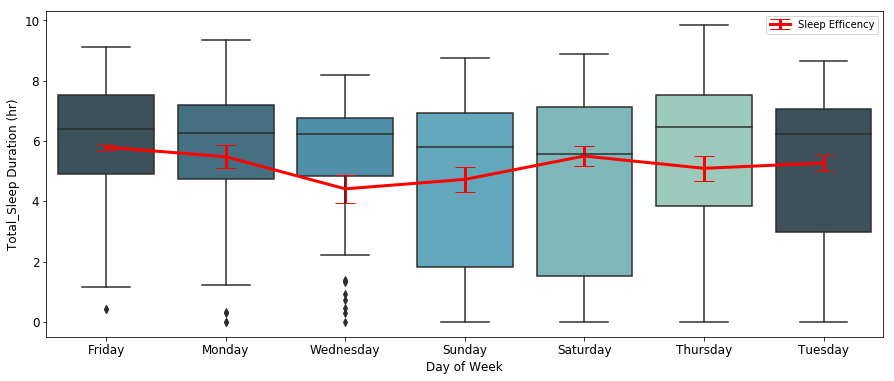

In [97]:
eff_sleep_mean = (sleep_df.groupby(sleep_df.start_time.dt.day_name()).sleep_efficiency.mean()*sleep_df.groupby(sleep_df.start_time.dt.day_name()).total_sleep_duration.mean())/100
eff_sleep_std = (sleep_df.groupby(sleep_df.start_time.dt.day_name()).sleep_efficiency.std()*sleep_df.groupby(sleep_df.start_time.dt.day_name()).total_sleep_duration.std())/100

fig, ax = plt.subplots(figsize=(15,6));
ax.errorbar(eff_sleep_mean.index, eff_sleep_mean, yerr=eff_sleep_std, color='r', linewidth=3, capsize=10);
ax.legend(['Sleep Efficency']);
sns.boxplot(sleep_df.start_time.dt.day_name(), sleep_df.sleep_efficiency*sleep_df.total_sleep_duration/100, palette=sns.color_palette("GnBu_d"))
ax.set_xlabel("Day of Week", fontsize=12);
ax.set_ylabel("Total_Sleep Duration (hr)", fontsize=12);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

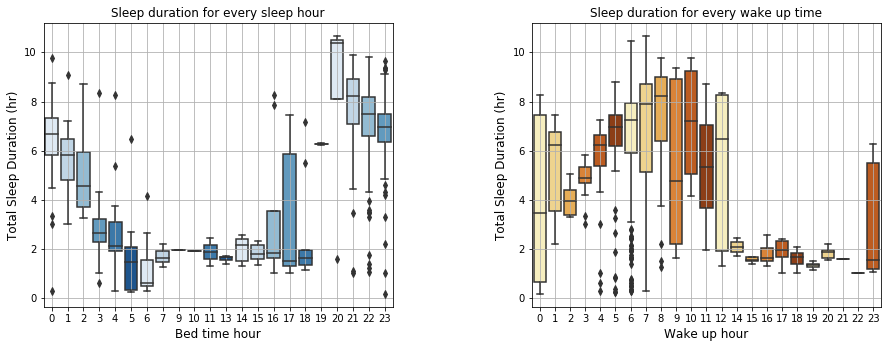

In [57]:
fig = plt.figure(figsize=(15,12))

plt.subplots_adjust(wspace=0.4, hspace=0.3)


plt.subplot(221)

ax1=sns.boxplot(sleep_df.start_time.dt.hour, sleep_df.total_sleep_duration,\
                palette=sns.color_palette("Blues")).set_title("Sleep duration for every sleep hour")

plt.ylabel("Total Sleep Duration (hr)", fontsize=12)
plt.xlabel("Bed time hour", fontsize=12)
plt.grid(True)

plt.subplot(222)
ax2=sns.boxplot(sleep_df.end_time.dt.hour, sleep_df.total_sleep_duration,\
                palette=sns.color_palette("YlOrBr")).set_title("Sleep duration for every wake up time")
plt.ylabel("Total Sleep Duration (hr)", fontsize=12)
plt.xlabel("Wake up hour", fontsize=12)
plt.grid(True)

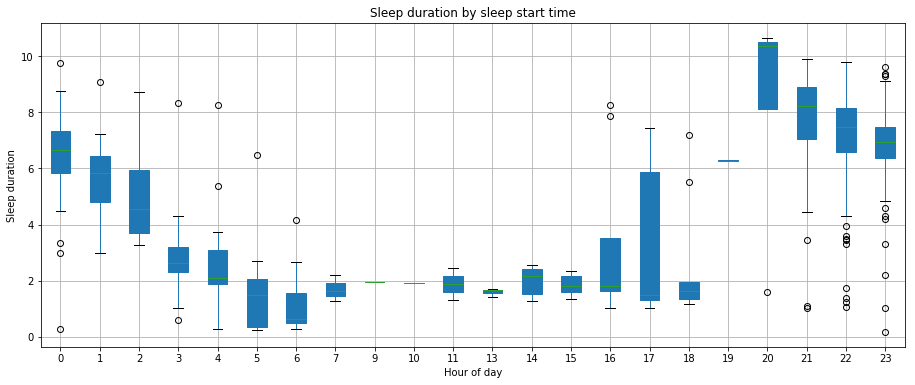

In [58]:
ig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,6));
box=sleep_df.boxplot(column=["total_sleep_duration"], by=sleep_df.start_time.dt.hour, ax=ax, patch_artist=True,grid=True);
plt.suptitle('');
plt.xlabel("Hour of day");
plt.ylabel("Sleep duration");
plt.title("Sleep duration by sleep start time");
plt.show();

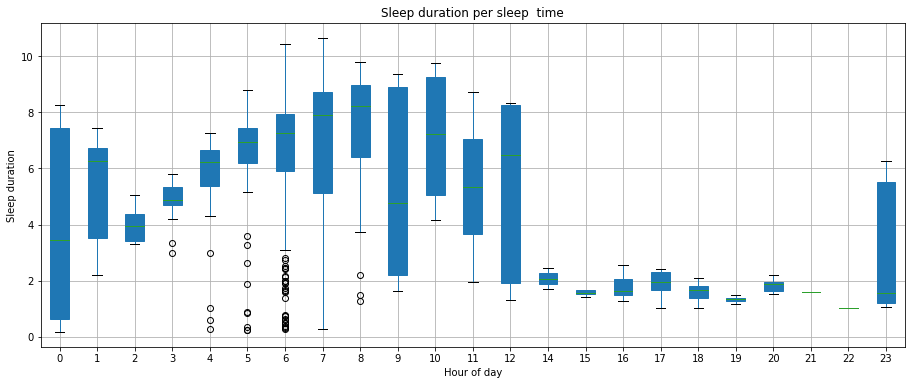

In [59]:
ig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,6))
box=sleep_df.boxplot(column=["total_sleep_duration"], by=sleep_df.end_time.dt.hour, ax=ax, patch_artist=True,grid=True)
plt.suptitle('')
plt.xlabel("Hour of day")
plt.ylabel("Sleep duration")
plt.title("Sleep duration per End time")
plt.show()

### 2. Step Count Data

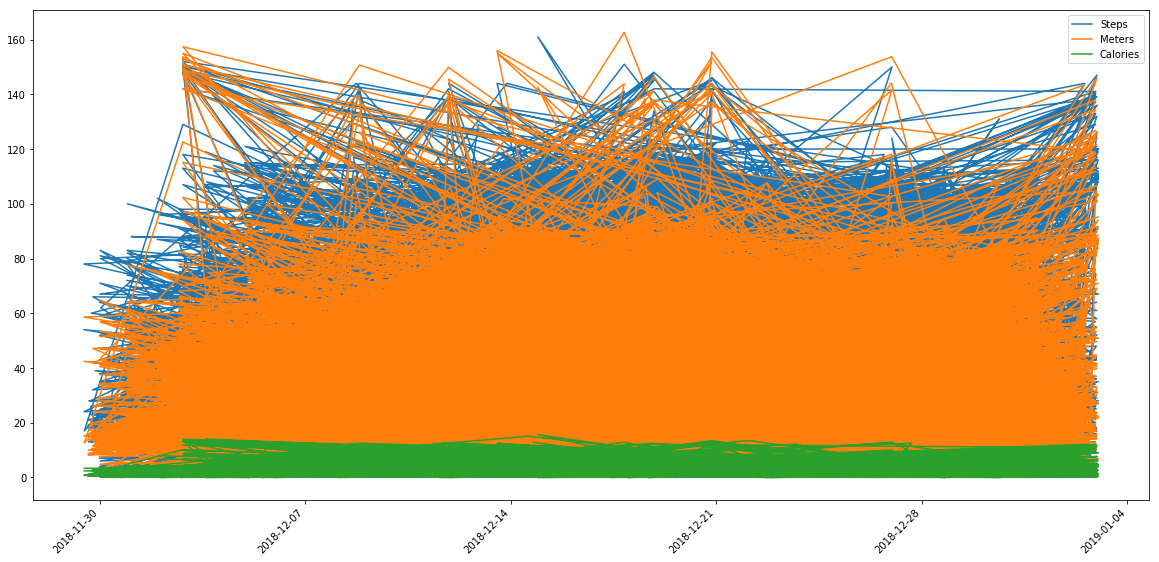

In [60]:
fig, ax1 = plt.subplots(1, 1, figsize = (20, 10))
ax1.plot(step_count_df['create_time'], step_count_df['step_count'], '-', label = 'Steps')
ax1.plot(step_count_df['create_time'], step_count_df['step_distance'], '-', label = 'Meters')
ax1.plot(step_count_df['create_time'], step_count_df['step_calorie'], '-', label = 'Calories')
ax1.legend()
fig.autofmt_xdate(rotation = 45)

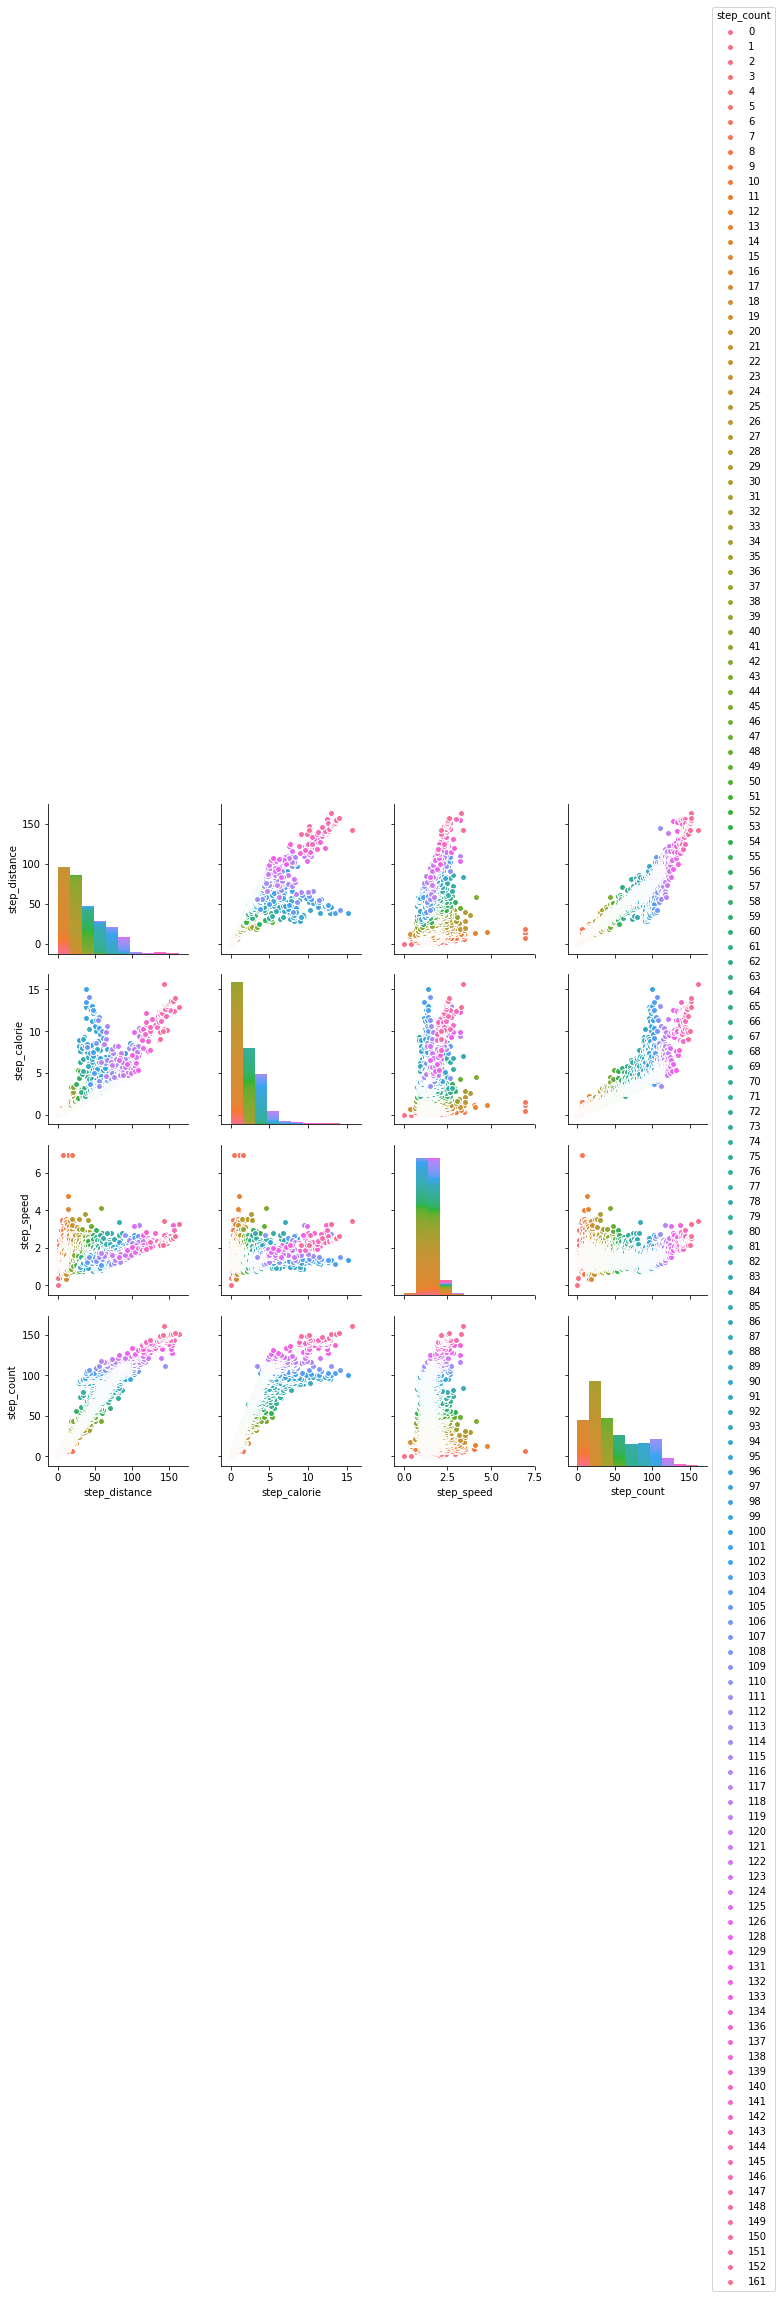

In [61]:
sns.pairplot(hue = 'step_count', data = step_count_df[['step_distance', 'step_calorie',\
                                                       'step_speed','step_count']]);

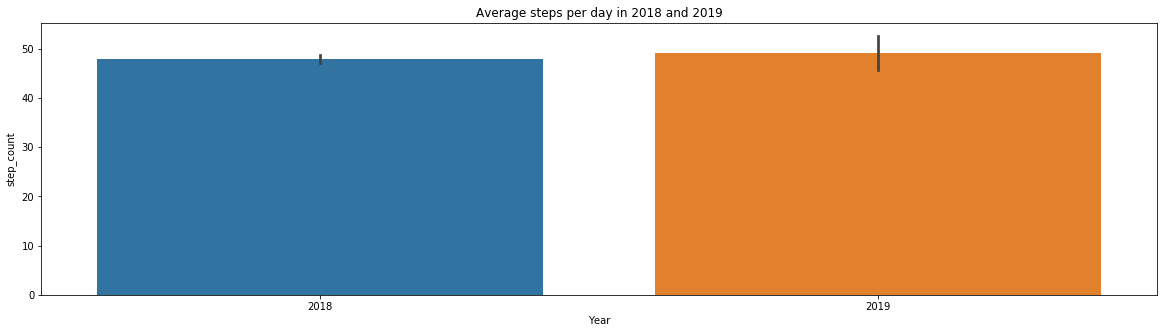

In [62]:
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.title('Average steps per day in 2018 and 2019')
sns.barplot(x='Year', y=step_count_df['step_count'],\
            data=step_count_df[step_count_df['Year']>2017]);

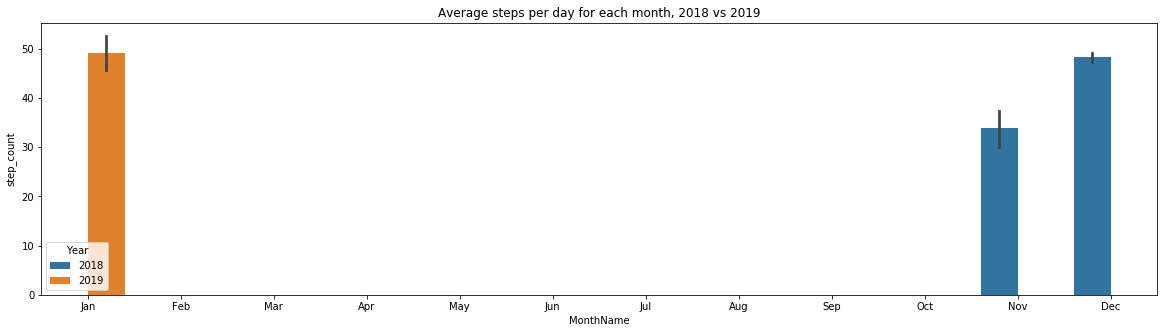

In [63]:
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.title('Average steps per day for each month, 2018 vs 2019')
sns.barplot(x='MonthName', y='step_count', data=step_count_df[step_count_df['Year']>2017], hue='Year',\
            order = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

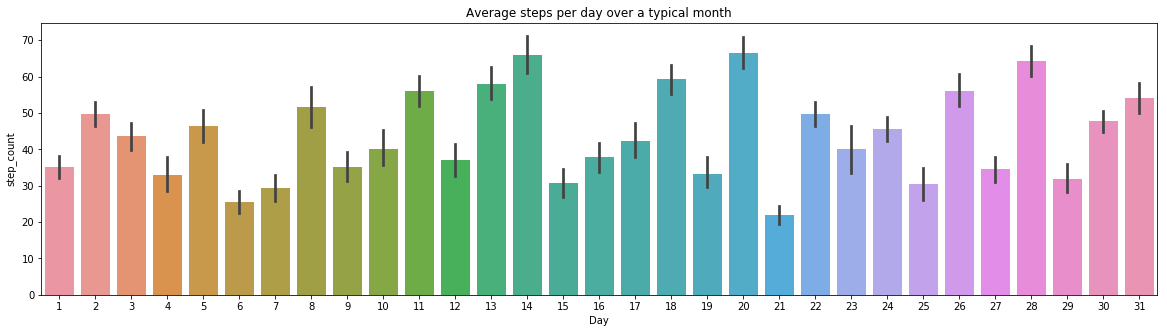

In [64]:
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.title('Average steps per day over a typical month')
sns.barplot(x='Day', y='step_count', data=step_count_df);

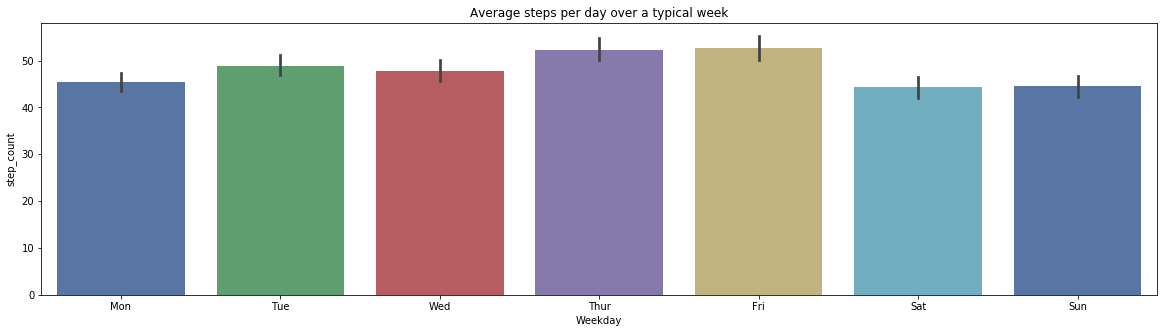

In [65]:
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.title('Average steps per day over a typical week')
sns.barplot(x='Weekday', y='step_count', data=step_count_df, order = ['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun'],\
            palette = 'deep');

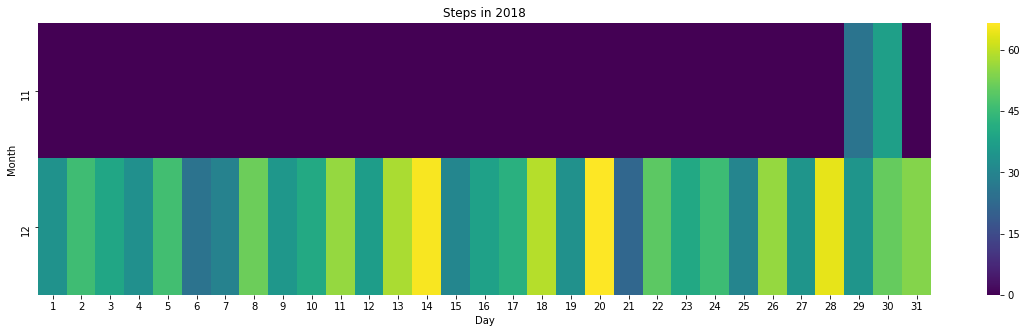

In [66]:
piv = step_count_df[step_count_df['Year']==2018].pivot_table(index='Month',columns='Day', values='step_count').fillna(0)
plt.figure(figsize=(20,5))
plt.title('Steps in 2018')
sns.heatmap(piv, cmap='viridis');

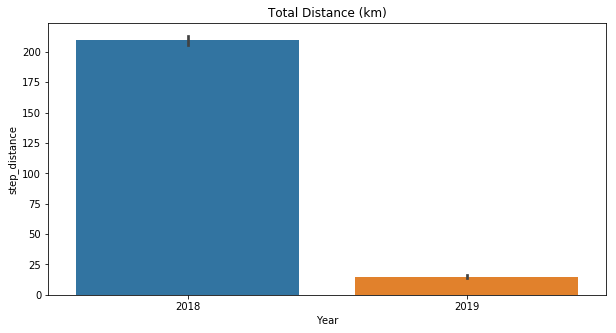

In [67]:
plt.figure(figsize=(10,5))
plt.title('Total Distance (km)')
sns.barplot(x='Year', y=step_count_df['step_distance']/1000, data=step_count_df[step_count_df['Year']>2017], estimator= sum);

C:\Users\PARI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


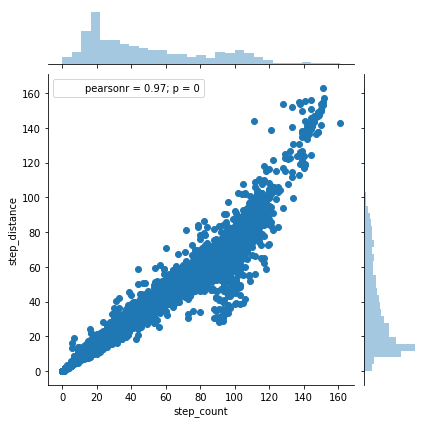

In [68]:
sns.jointplot(x='step_count', y='step_distance', data=step_count_df);

In [82]:
print('Laziest day = {}'.format(step_count_df['step_count'].min()))
print('Busiest day = {}'.format(step_count_df['step_count'].max()))
# sns.jointplot(x= step_count_df['step_count'], y= step_count_df['step_count'].apply(lambda values : at_least(values)));

Laziest day = 0
Busiest day = 161


### 3. Exercise Data

In [84]:
exercise_df.head()

,end_time,start_time,max_heart_rate,mean_heart_rate,max_cadence,time_offset,exercise_max_speed,exercise_calorie,mean_speed,min_heart_rate,...,Day,Year,Weekday,MonthName,Month,YearMonth,exercised_time,places,name_of_exercise,hour
0,2018-04-07 21:40:40.673,2018-04-07 21:26:10.149,0.0,0.0,0.0,UTC-0400,1.588526,58.42,1.257754,0.0,...,7,2018,Sat,Apr,4,4-2018,0.241812,Halifax(Atlantic),Walking,21
1,2018-01-27 15:08:00.000,2018-01-27 14:38:00.000,NaN,NaN,NaN,UTC-0500,NaN,252.00,0.000000,NaN,...,27,2018,Sat,Jan,1,1-2018,0.500000,Toronto(Eastern),Swimming,15
2,2018-09-04 01:35:14.221,2018-09-04 01:23:23.355,0.0,0.0,0.0,UTC-0400,1.500000,55.49,1.395675,0.0,...,4,2018,Tue,Sep,9,9-2018,0.197463,Halifax(Atlantic),Walking,1
3,2018-09-12 01:33:53.262,2018-09-12 01:21:34.461,0.0,0.0,0.0,UTC-0400,1.416667,44.96,1.258918,0.0,...,12,2018,Wed,Sep,9,9-2018,0.205223,Halifax(Atlantic),Walking,1
4,2018-05-01 22:12:20.915,2018-05-01 22:01:24.059,0.0,0.0,0.0,UTC-0400,1.571783,43.85,1.323111,0.0,...,1,2018,Tue,May,5,5-2018,0.182460,Halifax(Atlantic),Walking,22


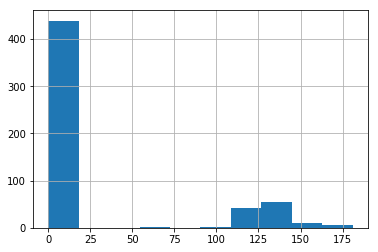

In [70]:
exercise_df['mean_heart_rate'].hist();

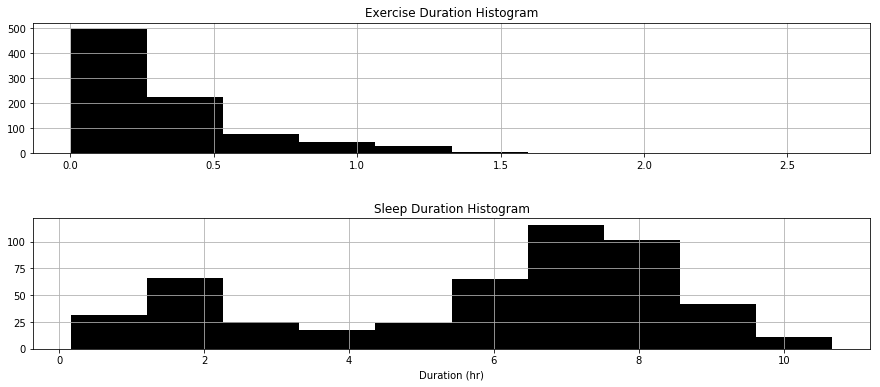

In [71]:
fig, axs = plt.subplots(2, 1, sharex=False, figsize=(15,6))

fig.subplots_adjust(hspace=0.5);
axs[0].hist(exercise_df.exercised_time, color='k');
axs[0].set_title("Exercise Duration Histogram")
axs[0].grid(True)
axs[1].hist(sleep_df.total_sleep_duration, color='k');
axs[1].set_xlabel("Duration (hr)")
axs[1].set_title("Sleep Duration Histogram")
axs[1].grid(True)

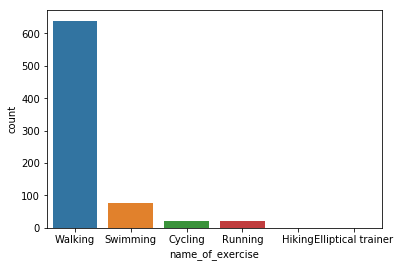

In [99]:
sns.countplot(x="name_of_exercise", data=exercise_df);

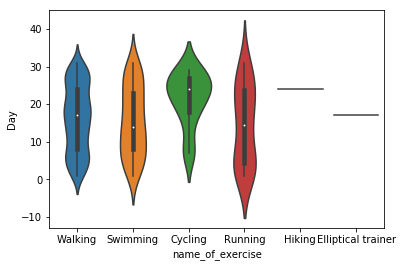

In [88]:
 ax = sns.violinplot(x="name_of_exercise", y="Day", data=exercise_df);

In [83]:
exercise_df['hour'] = exercise_df['create_time'].dt.hour
sns.pairplot(hue = 'is_weekend', data = exercise_df[['exercise_type', 'exercise_calorie', 'exercise_name',\
                                                       'mean_speed', 'hour', 'is_weekend']]);

KeyError: "['exercise_type' 'exercise_name' 'is_weekend'] not in index"

### 4. Heart Rate Data

### 5. Floor Climbed  Data